In [1]:
import os
import fileinput
import csv

import numpy as np

import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.cm as cm
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [61]:
class cdat:
    def __init__(self):
        self.name = ''
        self.idx = []
        self.dte = []
        self.con = []
        self.rec = []
        self.ded = []
        self.gf = []
    def gfactor(self):
        if len(self.gf) == 0:
            self.gf = np.zeros_like(self.idx, dtype=float)
            for i in range(1,len(self.idx)):
                if(self.con[i-1] > 0):
                    self.gf[i] = float(self.con[i])/float(self.con[i-1])
        return self.gf

def readdata_wrd(path, dest):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[1]))
                dest.ded.append(int(row[3]))
#                 print(dest.idx[-1])
        print(f'Processed {line_count} lines.')
    dest.name = 'World'
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

def readdata_cnt(path, dest, cntname):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            elif row[1] == cntname:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[2]))
                dest.ded.append(int(row[4]))
#                 print(dest.idx[-1])
#                 print(d, row[2])
            else:
                pass
        print(f'Processed {line_count} lines.')
    dest.name=cntname
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [62]:
clist = []

clist.append(cdat())
readdata_wrd('../data/worldwide-aggregated.csv', clist[-1])

for c in ['Poland', 'Italy', 'US', 'Germany', 'Spain', 'France', 'Japan']:
    clist.append(cdat())
    readdata_cnt('../data/countries-aggregated.csv', clist[-1], c)
print('From: ', clist[0].dte[0], 'To', clist[0].dte[-1])

Column names are Date, Confirmed, Recovered, Deaths, Increase rate
Processed 73 lines.
Processed 73 lines.
Processed 73 lines.
Processed 73 lines.
Processed 73 lines.
Processed 73 lines.
Processed 73 lines.
Processed 73 lines.
From:  2020-01-22 To 2020-04-02


In [63]:
for c in clist:
    print("{0:>7}".format(c.name), len(c.idx))

  World 72
 Poland 72
  Italy 72
     US 72
Germany 72
  Spain 72
 France 72
  Japan 72


In [66]:
print(clist[1].idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]


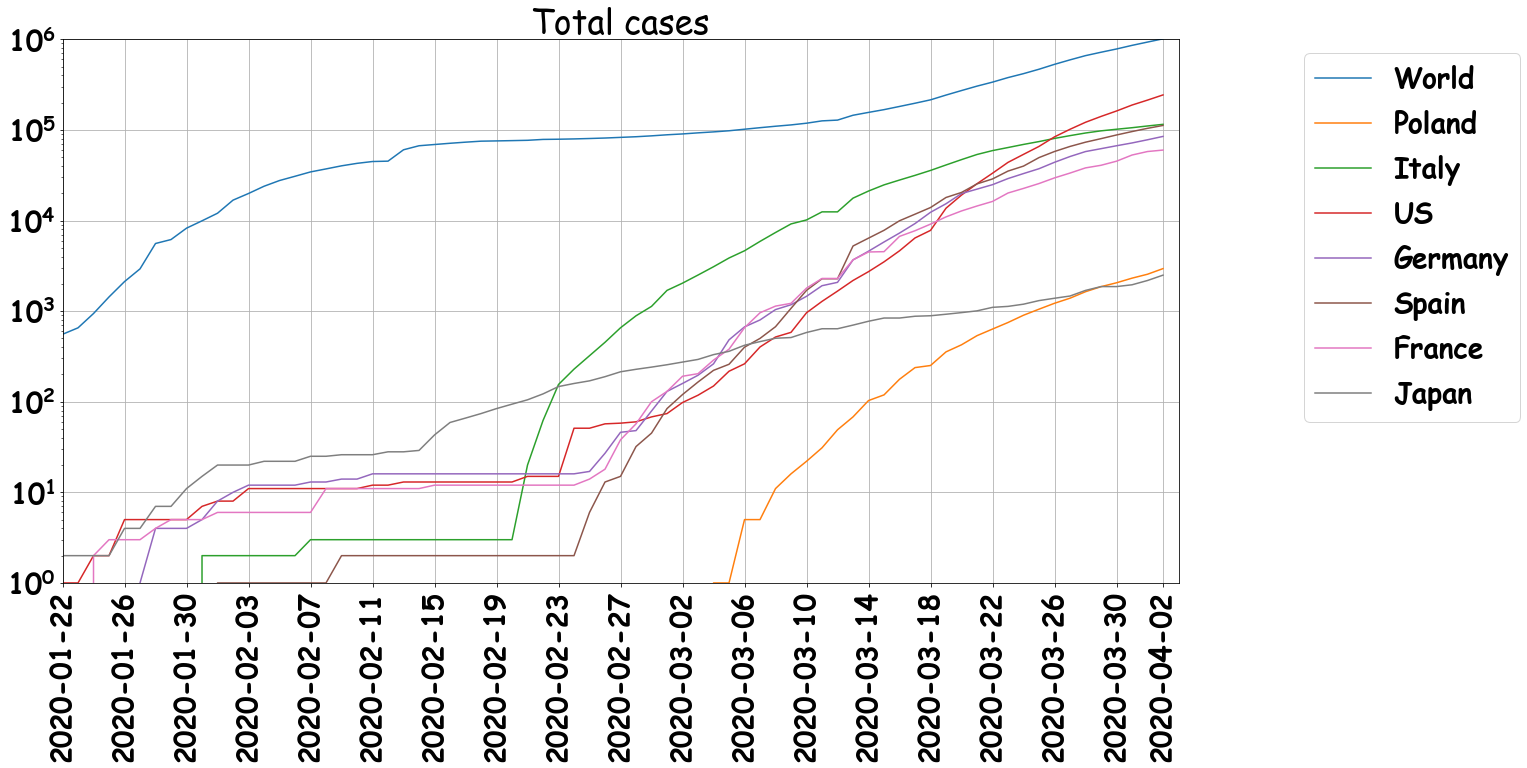

In [65]:
%matplotlib inline
font = {'family' : 'Comic Sans MS',
        'weight' : 'bold',
        'size'   : 28}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.con, label=c.name)
    
plt.title('Total cases')
plt.yscale('log')
plt.ylim(1,1e6)
plt.xlim(0, clist[0].idx[-1]+1)
plt.legend(bbox_to_anchor=(1.1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]: lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

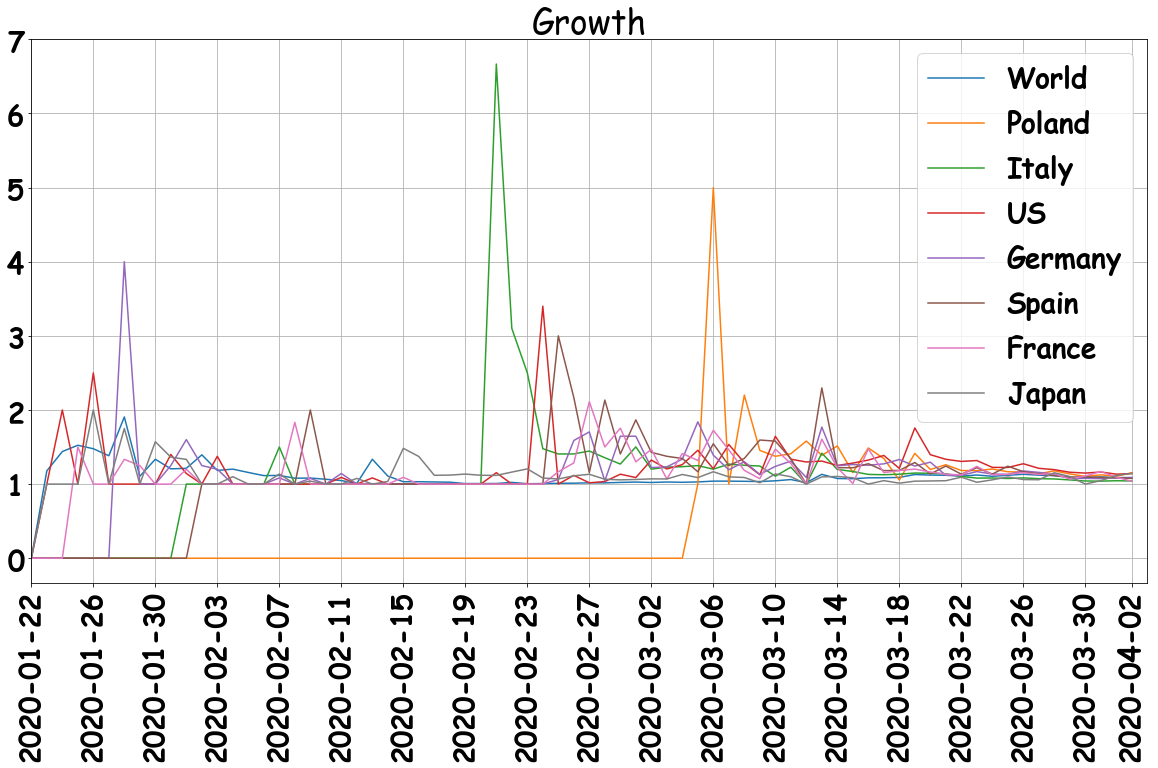

In [67]:
fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(0, clist[0].idx[-1]+1)
# plt.yscale('log')
# plt.ylim(1,1e6)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]: lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

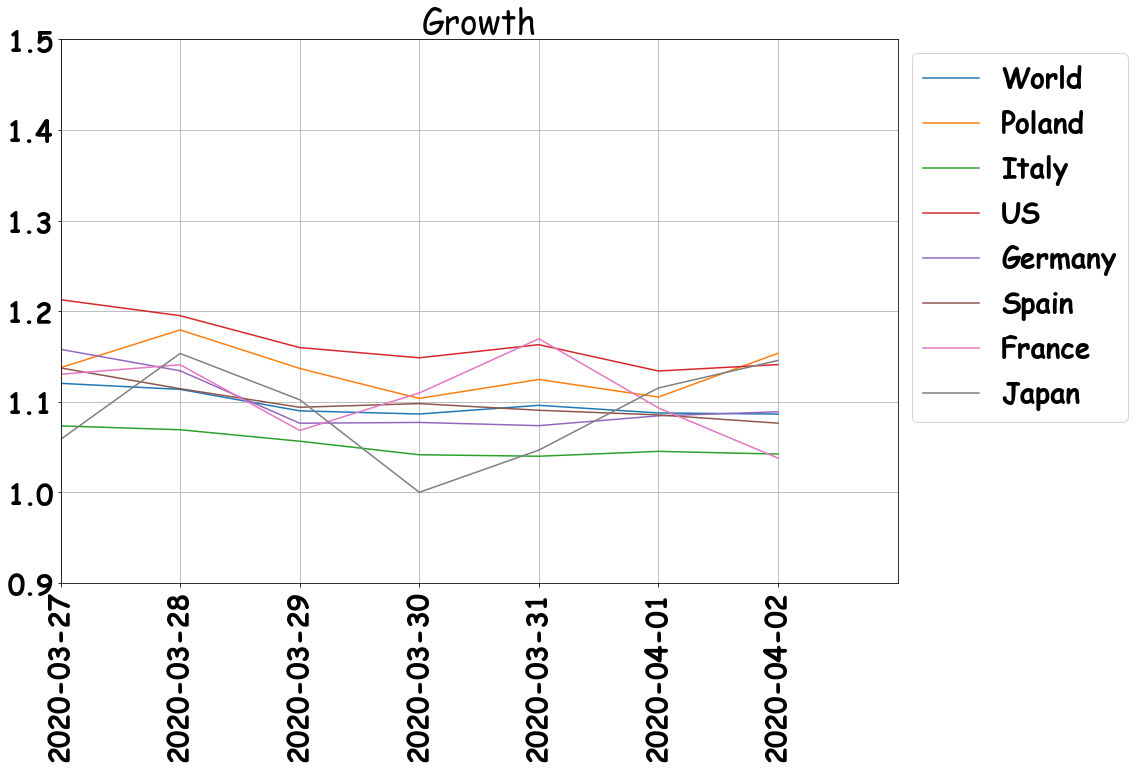

In [71]:
fig, ax = plt.subplots(figsize=(15,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(clist[0].idx[-7], clist[0].idx[-1]+1)
plt.ylim(0.9,1.5)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 1
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]: lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

In [72]:
for d in clist:
    av = np.mean([x for x in d.gf if x])
    print("{0:>7}".format(d.name), av)

  World 1.1196580179716855
 Poland 1.4024930247585945
  Italy 1.278222834089585
     US 1.2250093742832533
Germany 1.2242185817441644
  Spain 1.2515687722371918
 France 1.1805303225865411
  Japan 1.1156265679957287


In [73]:
for d in clist:
    av = np.mean([x for x in d.gf[-7:] if x])
    print("{0:>7}".format(d.name), av)

  World 1.0971810162501423
 Poland 1.1343528779009813
  Italy 1.0525026036421832
     US 1.1648072393573832
Germany 1.0988967920163548
  Spain 1.099400522094409
 France 1.1070678527859
  Japan 1.0887474554096859


In [74]:
for d in clist:
    print("{0:>7}".format(d.name), d.dte[-1], "{0:>6}".format(d.con[-1]), "{0:>5}".format(d.con[-1]-d.con[-2]), d.gf[-1])

  World 2020-04-02 1013157 80552 1.0863731161638637
 Poland 2020-04-02   2946   392 1.1534847298355522
  Italy 2020-04-02 115242  4668 1.042216072494438
     US 2020-04-02 243453 30081 1.1409791350317755
Germany 2020-04-02  84794  6922 1.088889459626053
  Spain 2020-04-02 112065  7947 1.0763268599089495
 France 2020-04-02  59929  2180 1.0377495714211502
  Japan 2020-04-02   2495   317 1.1455463728191


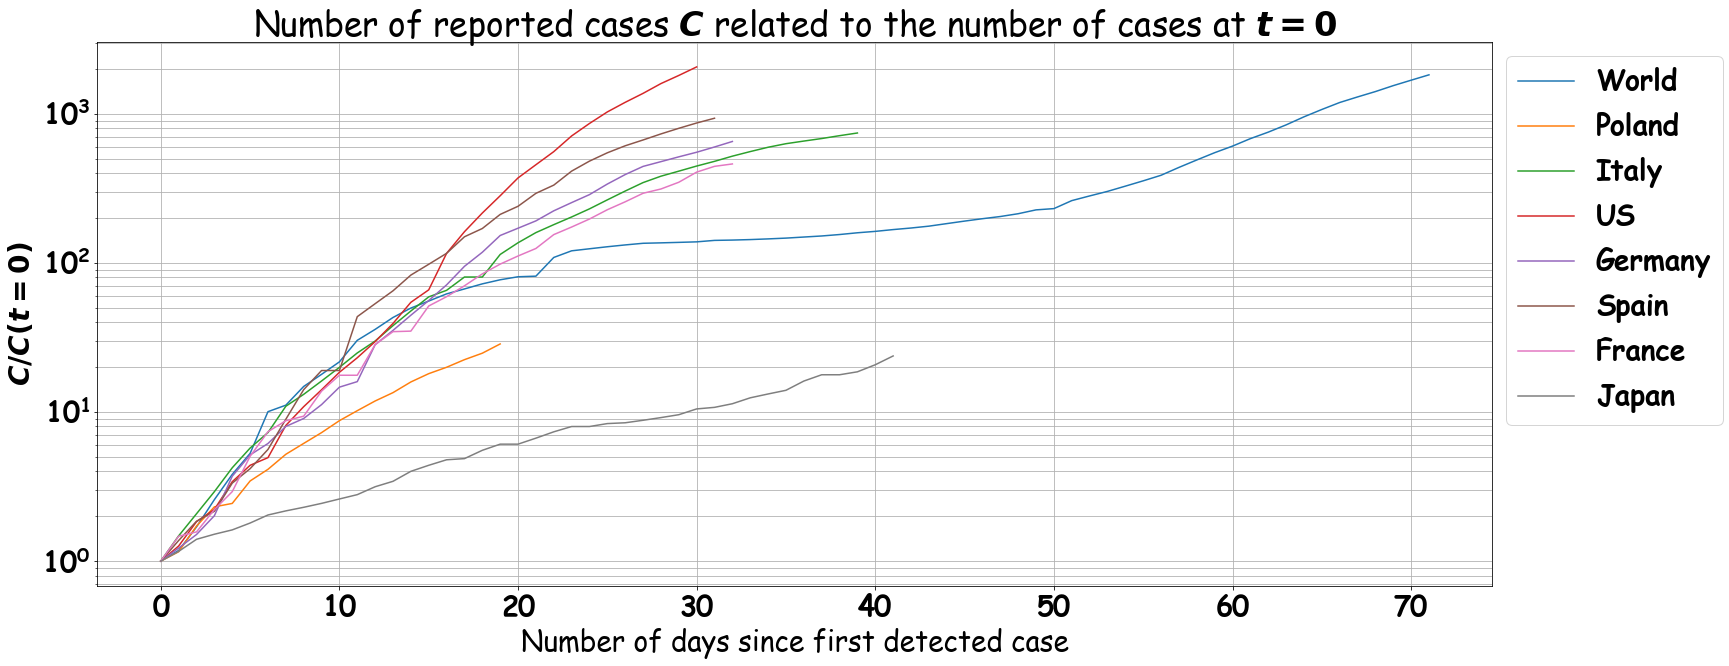

In [75]:
fig, ax = plt.subplots(figsize=(25,10))

for c in clist:
    con = np.array([x for x in c.con if x > 100])
    con = con/con[0]
    idx = range(0,len(con))
    plt.plot(idx, con, label=c.name)

plt.title('Number of reported cases $C$ related to the number of cases at $t=0$')
plt.xlabel('Number of days since first detected case')
plt.ylabel('$C/C(t=0)$')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
plt.grid(which='both')

## Time it takes to multiply by 10

In [78]:
c = clist[1]
idx1 = next(i for i,x in enumerate(c.con) if x > 10)
idx2 = next(i for i,x in enumerate(c.con) if x > 100)
print(idx2-idx1)
idx1 = next(i for i,x in enumerate(c.con) if x > 100)
idx2 = next(i for i,x in enumerate(c.con) if x > 1000)
print(idx2-idx1)

6
11


In [79]:
exp = c.con[-1]
for i in range(1,30):
    exp *= 1.1
    exp = round(exp)
    print(i, exp)

1 3241.0
2 3565.0
3 3922.0
4 4314.0
5 4745.0
6 5220.0
7 5742.0
8 6316.0
9 6948.0
10 7643.0
11 8407.0
12 9248.0
13 10173.0
14 11190.0
15 12309.0
16 13540.0
17 14894.0
18 16383.0
19 18021.0
20 19823.0
21 21805.0
22 23986.0
23 26385.0
24 29024.0
25 31926.0
26 35119.0
27 38631.0
28 42494.0
29 46743.0
